# Halo Mass Function

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import toolscosmo

### Set Code Parameters

In [2]:
# Code parameters
par = toolscosmo.par()
par.code.kmin = 0.001
par.code.kmax = 500
par.code.Nk   = 100
par.code.NM   = 90
par.code.Nz   = 50
par.code.verbose = True

In [3]:
# Cosmology
par.file.ps = "CAMB" #"CDM_Planck15_pk.dat"
par.cosmo.Om = 0.315
par.cosmo.Ob = 0.049
par.cosmo.s8 = 0.83 
par.cosmo.h0 = 0.673
par.cosmo.ns = 0.963
par.cosmo.Tcmb = 2.72

In [4]:
# Halo Mass Function parameters
par.mf.window = 'smoothk'  # [sharpk,smoothk,tophat]
par.mf.dc = 1.686          # delta_c
par.mf.p  = 0.3            # p par of f(nu) [0.3,0.3,1] for [ST,smoothk,PS] respectively
par.mf.q  = 1.0            # q par of f(nu) [0.707,1,1] for [ST,smoothk,PS] respectively
par.mf.c  = 3.3
par.mf.beta = 4.8

### Run Code

In [5]:
# Generate linear power spectrum
par.cosmo.plin = toolscosmo.get_Plin(par)

# Compute Halo Mass Function
ms, zs, dndlnm = toolscosmo.massfct.dndlnm(par)

Using CAMB to estimate linear power spectrum.
sigma_8=0.811
CAMB runtime: 1.76 s
Preparing cosmological solvers...
astropy will be used.
...done


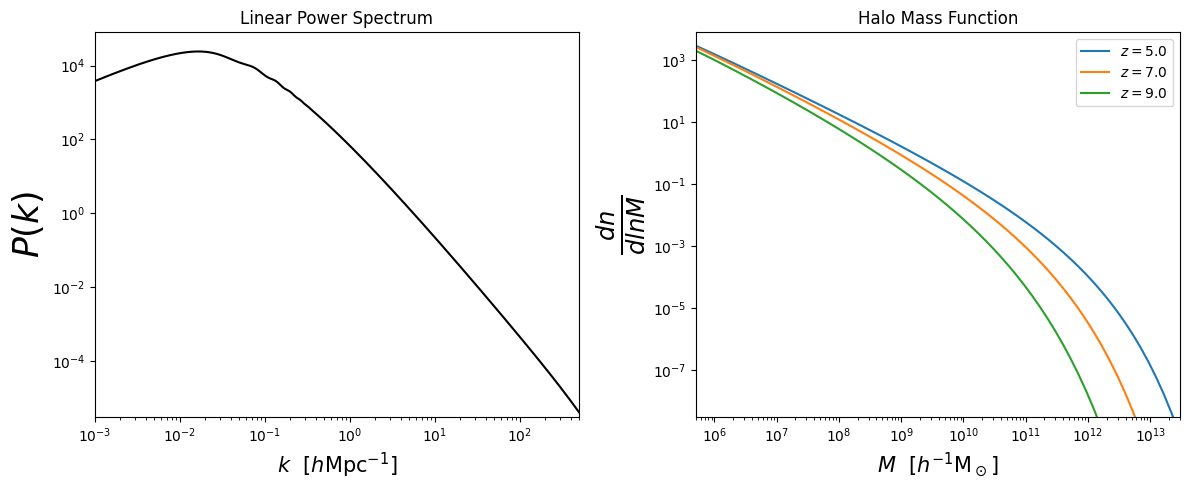

In [6]:
zplots = [5,7,9]
fig, axs = plt.subplots(1,2,figsize=(12,5))
ax = axs[0]
ax.set_title('Linear Power Spectrum')
ax.loglog(par.cosmo.plin['k'], par.cosmo.plin['P'], ls='-', c='k')
ax.axis([1e-3,500,3e-6,8e4])
ax.set_ylabel(r'$P(k)$', fontsize=25)
ax.set_xlabel(r'$k~~[h\mathrm{Mpc}^{-1}]$', fontsize=15)
ax = axs[1]
ax.set_title('Halo Mass Function')
for ii,zi in enumerate(zplots):
    ax.loglog(ms, dndlnm[np.abs(zs-zi).argmin(),:], 
              label='$z={:.1f}$'.format(zi), 
              ls='-', c='C{}'.format(ii),
              )
ax.axis([5e5,3e13,3e-9,8e3])
ax.set_ylabel(r'$\frac{dn}{dlnM}$', fontsize=25)
ax.set_xlabel(r'$M~~[h^{-1}\mathrm{M}_\odot]$', fontsize=15)
ax.legend()
plt.tight_layout()
plt.show()